<a href="https://colab.research.google.com/github/kunalNbadgujar/ANDROID-AUTHENTICITY-PREDICTION/blob/main/Osteoarthritis_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split 

import tensorflow as tf
from tensorflow import keras

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_dir = "/content/drive/MyDrive/Internshala Assignement/assignment 4 ( Osteoarthritis )/Osteoarthritis_Assignment_dataset/train"
validation_dir = "/content/drive/MyDrive/Internshala Assignement/assignment 4 ( Osteoarthritis )/Osteoarthritis_Assignment_dataset/Valid"
test_dir = "/content/drive/MyDrive/Internshala Assignement/assignment 4 ( Osteoarthritis )/Osteoarthritis_Assignment_dataset/test"

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range = 40,
      width_shift_range = 0.2,
      height_shift_range = 0.2,
      shear_range = 0.2,
      zoom_range = 0.2,
      horizontal_flip = True )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2350 images belonging to 2 classes.
Found 641 images belonging to 2 classes.


In [6]:
  from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.applications.inception_v3 import InceptionV3


In [7]:

conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

87910968/87910968 [==============================] - 1s 0us/step


In [8]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [9]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 256)               4718848   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 26,521,889
Trainable params: 26,487,457
Non-trainable params: 34,432
_________________________________________________________________


In [11]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate = 2e-5 ),
              metrics=['acc'])

In [14]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=32)

<ipython-input-14-166b9a9fc790>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 684s 7s/step - loss: 0.5433 - acc: 0.7101 - val_loss: 0.5016 - val_acc: 0.6984
Epoch 2/30
100/100 [==============================] - 550s 6s/step - loss: 0.4728 - acc: 0.7618 - val_loss: 0.5088 - val_acc: 0.7297
Epoch 3/30
100/100 [==============================] - 552s 6s/step - loss: 0.3899 - acc: 0.8015 - val_loss: 0.4314 - val_acc: 0.8031
Epoch 4/30
100/100 [==============================] - 554s 6s/step - loss: 0.3794 - acc: 0.8130 - val_loss: 0.6470 - val_acc: 0.7594
Epoch 5/30
100/100 [==============================] - 543s 5s/step - loss: 0.3430 - acc: 0.8442 - val_loss: 0.3753 - val_acc: 0.8453
Epoch 6/30
100/100 [==============================] - 549s 5s/step - loss: 0.3174 - acc: 0.8590 - val_loss: 0.3315 - val_acc: 0.8687
Epoch 7/30
100/100 [==============================] - 547s 5s/step - loss: 0.3010 - acc: 0.8685 - val_loss: 0.1364 - val_acc: 0.9469
Epoch 8/30
100/100 [==============================] - 557s 6s/step - 

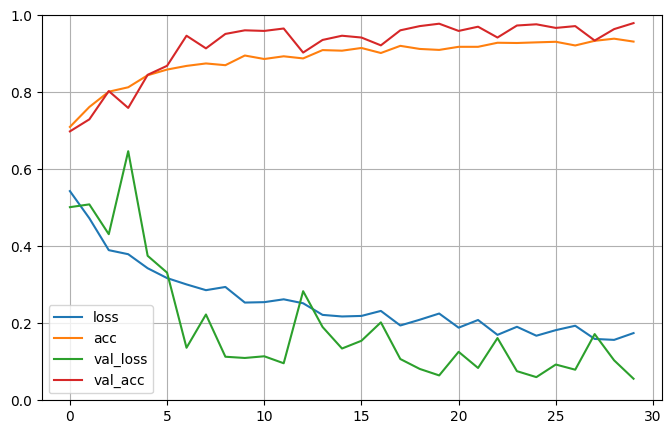

In [15]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [16]:
model.save("Osteoarthritis.h5")

In [17]:
%pwd

'/content'

In [18]:
%cd /content/drive/MyDrive/save_models

/content/drive/MyDrive/save_models


In [19]:
model.save("Osteoarthritis.h5")